In [1]:
import pandas as pd

import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer

from nltk.tokenize.toktok import ToktokTokenizer

from tqdm.notebook import tqdm

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
tqdm.pandas()

import spacy

from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorboard.plugins import projector
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/test.csv')

In [3]:
train_df

,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13
...,...,...,...,...,...
70400,Pretty much.,jerry,S05E09,Seinfeld,2
70401,"Oh, well um, not right now. Y'know I’m just g...",phoebe,Season-03 Episode-05-The One With Frank Jr.,Friends,22
70402,"Ooh, I think I wanna trade circles.",phoebe,Season-07 Episode-22-The One With Chandler’s Dad,Friends,7
70403,"Hey, hey, what is this? What's going on here?",jerry,S05E03,Seinfeld,9


In [4]:
test_df

,Dialogue,Character,Episode,Show,Dialogue_length
0,"Oh my God, that's great! I'm smart!! No, no, ...",joey,Season-10 Episode-05-The One Where Rachel's Si...,Friends,30
1,"Listen, I’m sure that dad doesn’t care. He pr...",monica,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,20
2,Well I am. Couldn't you try to go through some...,george,S09E16,Seinfeld,18
3,Yes I am. We had a verbal contract. If we can'...,kramer,S07E13,Seinfeld,20
4,"Um, I straightened out your shower curtain so...",monica,Season-02 Episode-18-The One Where Dr. Remore ...,Friends,17
...,...,...,...,...,...
4240,"I’d say, come again. No-no, wait I-I-I know t...",joey,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,15
4241,"Okay. (they both look into the camera, and Ro...",rachel,Season-10 Episode-04-The One With The Cake,Friends,22
4242,All right I've been feeling incredibly guilty...,ross,Season-08 Episode-19-The One With Joey’s Inter...,Friends,34
4243,"(getting up to leave) Well, the people have sp...",kramer,S09E15,Seinfeld,21


In [5]:
train_df['Show'].value_counts()

Friends     39092
Seinfeld    31313
Name: Show, dtype: int64

## Preprocessing

### Text cleaning

In [6]:
# Define function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

train_df['Dialogue'] = train_df['Dialogue'].apply(remove_special_characters)
test_df['Dialogue'] = test_df['Dialogue'].apply(remove_special_characters)

In [7]:
sentence_1 = train_df['Dialogue'][1]
sentence_1

' to Joey Are you gonna be embarrassed going up there having nothing prepared'

### Removing stop words

In [8]:
tokenizer = ToktokTokenizer()

# Create stop word list
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Removing the stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply function on review column
train_df['Dialogue'] = train_df['Dialogue'].apply(remove_stopwords)
test_df['Dialogue'] = test_df['Dialogue'].apply(remove_stopwords)

In [10]:
sentence_2 = train_df['Dialogue'][1]
print('before:', sentence_1,'\n','after:', train_df['Dialogue'][1])

before:  to Joey Are you gonna be embarrassed going up there having nothing prepared 
 after: Joey gonna embarrassed going nothing prepared


### Lemmatizer



In [11]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Lemmatize each word in the sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)

    return lemmatized_sentence

# Apply lemmatization to each sentence in the DataFrame
train_df['Lemmatized_Dialogue'] = train_df['Dialogue'].apply(lemmatize_sentence)
test_df['Lemmatized_Dialogue'] = test_df['Dialogue'].apply(lemmatize_sentence)
# Display the DataFrame with lemmatized dialogue
print(train_df[['Dialogue', 'Lemmatized_Dialogue']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                            Dialogue  \
0                                                Hey   
1      Joey gonna embarrassed going nothing prepared   
2                 Youre gonna tell Im gonna tell Noo   
3  Alright guys party number one ushers 3 guys Mo...   
4                                     sane blew mind   

                                 Lemmatized_Dialogue  
0                                                Hey  
1     Joey gon na embarrassed going nothing prepared  
2               Youre gon na tell Im gon na tell Noo  
3  Alright guy party number one usher 3 guy Monic...  
4                                     sane blew mind  


In [12]:
print(train_df['Lemmatized_Dialogue'][3])
print(train_df['Dialogue'][3])

Alright guy party number one usher 3 guy Monicas apartment party number two usher four woman apartment Two guy try follow Chandler block shoos Monicas apartment Alright fella let keep movin let keep movin
Alright guys party number one ushers 3 guys Monicas apartment party number two ushers four women apartment Two guys try follow Chandler blocks shoos Monicas apartment Alright fellas lets keep movin let keep movin


### Train-test-valdiation split

In [13]:
X = train_df['Lemmatized_Dialogue']
Y = train_df['Show']

x_test = test_df['Lemmatized_Dialogue']
y_test = test_df['Show']

In [14]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

Check that the distribution of our labels between test and train is not skewed toward one class:

In [15]:
train_label_count = y_train.value_counts()
test_label_count = y_test.value_counts()

print('Train negative to positive ratio:', train_label_count['Friends'] / train_label_count['Seinfeld'])
print('Test negative to positive ratio:', test_label_count['Friends'] / test_label_count['Seinfeld'])

Train negative to positive ratio: 1.2517412935323382
Test negative to positive ratio: 1.5742874469375379


In [16]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (63364,)
y_train shape: (63364,)
x_test shape: (4245,)
y_test shape: (4245,)
x_val shape: (7041,)
y_val shape: (7041,)


Convert 'Friends' to 0 and 'Seinfeld' to 1

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

## Modeling

In [18]:
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)

Convert to sequences:

In [19]:
x_train_dl = token.texts_to_sequences(x_train)
x_val_dl = token.texts_to_sequences(x_val)
x_test_dl = token.texts_to_sequences(x_test)

In [20]:
x_train_dl[1]

[170, 145]

Calculate document lengths:

In [21]:
doc_len_list = [len(doc) for doc in x_train_dl]

Longest, shortest, and average document:

In [22]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(186, 0, 5.884066662458178)

Let's examine the distribution:

<Axes: ylabel='Count'>

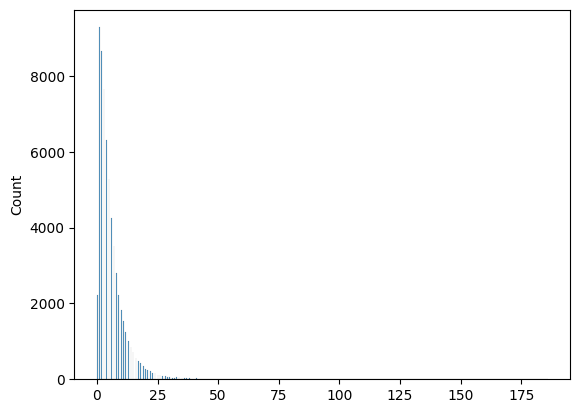

In [23]:
sns.histplot(doc_len_list)

50 seems like a reasonable shared length of words

In [24]:
max_words = 50

x_train_dl = sequence.pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = sequence.pad_sequences(x_val_dl, maxlen=max_words)
x_test_dl = sequence.pad_sequences(x_test_dl, maxlen=max_words)

Let's see what a sample look like:

In [25]:
total_words = len(token.word_index) + 1
total_words

24756

In [26]:
x_train_dl.shape

(63364, 50)

In [27]:
x_train_dl[10, :]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 619], dtype=int32)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))

# Bidirectional LSTM Layer (Return Sequences)
model.add(Bidirectional(LSTM(50, return_sequences=True)))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(50)))

model.add(Dropout(0.6))  # Adjust the dropout rate as needed

# Dense Layer
model.add(Dense(1, activation='sigmoid'))

model.compile(
     loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            792192    
                                                                 
 bidirectional (Bidirection  (None, 50, 100)           33200     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 885893 (3.38 MB)
Trainable params: 885893 

We will train the model with a maximum of 20 epochs, and we'll set a condition to stop epoching when the accuracy no longer improves.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [30]:
model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
1981/1981 [==============================] - 257s 125ms/step - loss: 0.5290 - accuracy: 0.7016 - val_loss: 0.4806 - val_accuracy: 0.7300
Epoch 2/20
1981/1981 [==============================] - 220s 111ms/step - loss: 0.4285 - accuracy: 0.7788 - val_loss: 0.4776 - val_accuracy: 0.7439
Epoch 3/20
1981/1981 [==============================] - 220s 111ms/step - loss: 0.3809 - accuracy: 0.8030 - val_loss: 0.4960 - val_accuracy: 0.7428
Epoch 4/20
1981/1981 [==============================] - 220s 111ms/step - loss: 0.3457 - accuracy: 0.8183 - val_loss: 0.5337 - val_accuracy: 0.7391
Epoch 5/20
1981/1981 [==============================] - 217s 109ms/step - loss: 0.3203 - accuracy: 0.8293 - val_loss: 0.5916 - val_accuracy: 0.7323


Let's evaluate our model:

In [31]:
model.evaluate(x_test_dl, y_test)
train_acc = model.evaluate(x_train_dl, y_train)[1]
model.evaluate(x_val_dl, y_val)

221/221 [==============================] - 6s 29ms/step - loss: 0.4776 - accuracy: 0.7439


[0.4776242673397064, 0.7439284324645996]

## Exploration

In [32]:
#Characters name by show
characters_by_show_df = test_df.groupby('Show')['Character'].unique().reset_index()
characters_by_show_df.columns = ['Show', 'Characters']
characters_by_show_df

,Show,Characters
0,Friends,"[joey, monica, rachel, ross, phoebe, chandler]"
1,Seinfeld,"[george, kramer, jerry, elaine]"


In [33]:
test_df

,Dialogue,Character,Episode,Show,Dialogue_length,Lemmatized_Dialogue
0,Oh God thats great Im smart Im uses Thesaurus ...,joey,Season-10 Episode-05-The One Where Rachel's Si...,Friends,30,Oh God thats great Im smart Im us Thesaurus br...
1,Listen Im sure dad doesnt care probably though...,monica,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,20,Listen Im sure dad doesnt care probably though...
2,Well Couldnt try go stuff put shoebox,george,S09E16,Seinfeld,18,Well Couldnt try go stuff put shoebox
3,Yes verbal contract cant take word lost,kramer,S07E13,Seinfeld,20,Yes verbal contract cant take word lost
4,Um straightened shower curtain wont get mildew...,monica,Season-02 Episode-18-The One Where Dr. Remore ...,Friends,17,Um straightened shower curtain wont get mildew...
...,...,...,...,...,...,...
4240,Id say come Nono wait III know one know one uh,joey,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,15,Id say come Nono wait III know one know one uh
4241,Okay look camera Ross waves Hi Emma Well first...,rachel,Season-10 Episode-04-The One With The Cake,Friends,22,Okay look camera Ross wave Hi Emma Well first ...
4242,right Ive feeling incredibly guilty wanna good...,ross,Season-08 Episode-19-The One With Joey’s Inter...,Friends,34,right Ive feeling incredibly guilty wan na goo...
4243,getting leave Well people spoken Well thats Im...,kramer,S09E15,Seinfeld,21,getting leave Well people spoken Well thats Im...


In [34]:
# Get the predicted probabilities for each class
predicted_probabilities = model.predict(x_test_dl)

# Convert the predicted probabilities to predicted class labels
predicted_classes = (predicted_probabilities > 0.5).astype(int)  # Assuming binary classification with threshold 0.5

# Assuming that '1' corresponds to 'Friends' and '0' corresponds to 'Seinfeld'
predicted_shows = ['Friends' if pred == 0 else 'Seinfeld' for pred in predicted_classes]

133/133 [==============================] - 5s 23ms/step


In [35]:
# Define a function to count correct and incorrect classifications for each character
def count_classification_errors(actual, predicted):
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    incorrect = len(actual) - correct
    return correct, incorrect

In [36]:
def process_show(characters, show_name, actuals, predictions):
    correct_counts = []
    incorrect_counts = []
    correct_percentages = []
    incorrect_percentages = []

    for character in characters:
        mask = (test_df['Character'] == character) & (test_df['Show'] == show_name)
        character_actuals = actuals[mask]
        character_predictions = [predictions[i] for i, m in enumerate(mask) if m]
        correct, incorrect = count_classification_errors(character_actuals, character_predictions)

        total = correct + incorrect
        correct_counts.append(correct)
        incorrect_counts.append(incorrect)
        correct_percentages.append((correct / total) * 100)
        incorrect_percentages.append((incorrect / total) * 100)

    return correct_counts, incorrect_counts, correct_percentages, incorrect_percentages

In [37]:
actual_shows = test_df['Show']

# Process Friends show
friends_correct_counts, friends_incorrect_counts, friends_correct_percentages, friends_incorrect_percentages = process_show(characters_by_show_df['Characters'][0], 'Friends', actual_shows, predicted_shows)

# Process Seinfeld show
seinfeld_correct_counts, seinfeld_incorrect_counts, seinfeld_correct_percentages, seinfeld_incorrect_percentages = process_show(characters_by_show_df['Characters'][1], 'Seinfeld', actual_shows, predicted_shows)

In [38]:
def plot_show_statistics(show_name, correct_counts, incorrect_counts, correct_percentages, incorrect_percentages, characters):
    plt.figure(figsize=(12, 8))
    bar_width = 0.4
    indices = range(len(characters))
    plt.bar(indices, correct_counts, width=bar_width, color='green', label=f'{show_name} - Correct')
    plt.bar(indices, incorrect_counts, bottom=correct_counts, width=bar_width, color='red', label=f'{show_name} - Incorrect')
    plt.xlabel('Character')
    plt.ylabel('Count')
    plt.title(f'Correct vs Incorrect Classifications for {show_name} Characters')
    plt.xticks(indices, characters, ha='right')
    plt.legend()

    # Add percentage labels
    for i, (correct, incorrect) in enumerate(zip(correct_percentages, incorrect_percentages)):
        plt.text(i, correct_counts[i] + 5, f'{correct:.1f}%', ha='center', color='black')
        plt.text(i, correct_counts[i] + incorrect_counts[i] + 5, f'{incorrect:.1f}%', ha='center', color='black')

    # Print accuracies for each character
    print(f'Accuracies for {show_name} Characters:')
    for character, correct, incorrect in zip(characters, correct_counts, incorrect_counts):
        total = correct + incorrect
        accuracy = correct / total if total > 0 else 0.0
        print(f'{character}: {accuracy:.2f}')

    plt.tight_layout()
    plt.show()

Accuracies for Friends Characters:
joey: 0.87
monica: 0.90
rachel: 0.90
ross: 0.89
phoebe: 0.92
chandler: 0.88


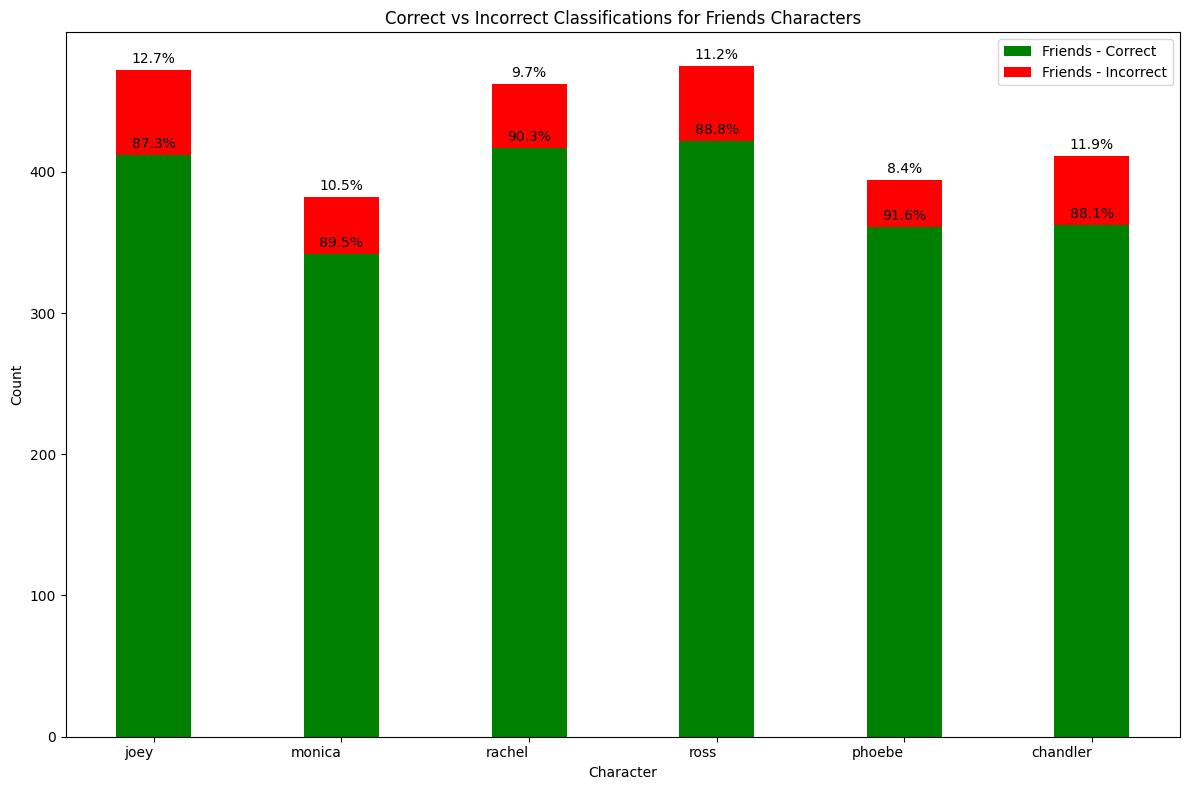

In [39]:
# Plot statistics for Friends
plot_show_statistics('Friends', friends_correct_counts, friends_incorrect_counts, friends_correct_percentages, friends_incorrect_percentages, characters_by_show_df['Characters'][0])

Accuracies for Seinfeld Characters:
george: 0.77
kramer: 0.80
jerry: 0.80
elaine: 0.72


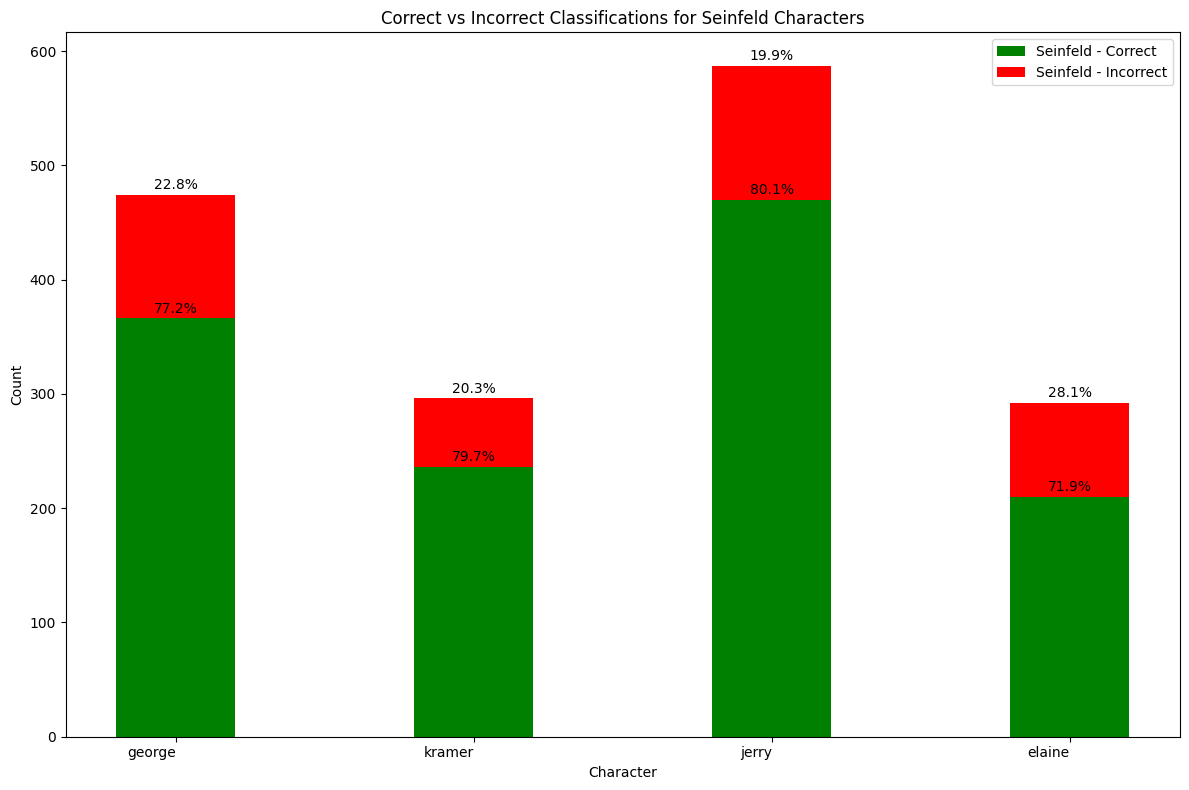

In [40]:
# Plot statistics for Seinfeld
plot_show_statistics('Seinfeld', seinfeld_correct_counts, seinfeld_incorrect_counts, seinfeld_correct_percentages, seinfeld_incorrect_percentages, characters_by_show_df['Characters'][1])

## Report

In [41]:
loss, accuracy = model.evaluate(x_test_dl, y_test)

133/133 [==============================] - 4s 30ms/step - loss: 0.3427 - accuracy: 0.8476


In [42]:
accuracy

0.8475853800773621

In [43]:
results = {'Test set accuracy': [accuracy],
           'Train set accuracy': [train_acc],
           'Number of trainable parameters': '885893',
           'Number of layers': '5',
           'Regularization methods': 'Dropout',
           'Number of epochs': '4',
           'Choice of loss function': 'binary_crossentropy',
           'Choice of optimizer': 'adam',
           'Embedding dimension': '32'
           }

In [44]:
df_results = pd.DataFrame(results)
df_results

,Test set accuracy,Train set accuracy,Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Choice of loss function,Choice of optimizer,Embedding dimension
0,0.847585,0.819771,885893,5,Dropout,4,binary_crossentropy,adam,32


In [45]:
# df_results to CSV
import os
df_results.to_csv(os.path.join(os.getcwd(), 'exercise3.csv'))